In [76]:
import assessmentModule as amod
import base64
import datetime as dt
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import scipy.io
import sys
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [290]:
data_dir = '/Users/todd/Google Drive/LT Assessments/COMPLETE/test'

In [291]:
out_dir = '/Users/todd/data/Assessment_ID_task'

In [292]:
os.chdir(data_dir)
process_files = glob.glob('*_process.mat')
assessment_ids = [i.split('_', 1)[0] for i in process_files]

In [293]:
exclude_file = '/Users/todd/code/AnalysisTools/config/exclude_assessments.txt'
with open(exclude_file, 'r') as fn:
    exclude_list = []
    for line in fn:
        exclude_list.append(line)
exclude_list = [i.strip('\n') for i in exclude_list]

In [294]:
for assess_id in assessment_ids:
    if assess_id in exclude_list:
        assessment_ids.remove(assess_id)

In [349]:
data = {}
for assess_id in assessment_ids:
    #data_process = amod.getMatlabData(assess_id + '_process.mat')
    data_sweep = amod.getMatlabData(assess_id + '_sweep.mat')
    data[assess_id] = data_sweep
    #data[assess_id].update(data_process)

In [350]:
exclude_keys = ['worker_details', 'protocol', 'links', 'training_zones', 'checkouts']
include_keys = ['user_id', 'sport', 'months_training',
                'days_per_week', 'distance_per_week',
                'stage_at_lt', 'created_at']

In [466]:
total_dict = {}
months_training = 999
days_per_week = 999
distance_per_week = 999
tags = ['user_id', 'sport', 'months_training',
        'days_per_week', 'distance_per_week',
        'stage_at_lt', 'created_at']
for assess_id in data.keys():
    minor_keys = tags
    tmp_dict = {}
    tmp_list = []
    for key in minor_keys:
        try:
            quantity = data[assess_id]['assessment'][key]
        except:
            quantity = np.array(999)
        tmp_dict[key] = quantity
        #if key == 'stage_at_lt':
        #    quantity = int(quantity)
        #if key == 'user_id':
        #    quantity = np.asscalar(quantity)
        #if key == 'sport':
        #    quantity = repr(quantity[0])
        #if key == 'created_at':
        #    quantity = repr(quantity[0])
        # Look at SmO2.
        #if major_key == 'process' and key == 'SmO2':
        #    smo2_mean = np.nanmean(quantity)
        #    smo2_median = np.nanmedian(quantity)
        #    print('SmO2 mean', smo2_mean,
        #          'SmO2 median', smo2_median)
        print(assess_id, key, quantity)
        tmp_list.append(quantity)
    total_dict[assess_id] = tmp_dict

54d748f5adac18f20e8b4abf user_id ['529']
54d748f5adac18f20e8b4abf sport ['bike']
54d748f5adac18f20e8b4abf months_training 999
54d748f5adac18f20e8b4abf days_per_week 999
54d748f5adac18f20e8b4abf distance_per_week 999
54d748f5adac18f20e8b4abf stage_at_lt [[7]]
54d748f5adac18f20e8b4abf created_at ['2015-02-08 11:31:01']
54c033adadac18db278b497c user_id ['322']
54c033adadac18db278b497c sport ['bike']
54c033adadac18db278b497c months_training 999
54c033adadac18db278b497c days_per_week 999
54c033adadac18db278b497c distance_per_week 999
54c033adadac18db278b497c stage_at_lt [[8]]
54c033adadac18db278b497c created_at ['2015-01-21 23:18:05']
54c13196adac18f10e8b492a user_id ['322']
54c13196adac18f10e8b492a sport ['bike']
54c13196adac18f10e8b492a months_training 999
54c13196adac18f10e8b492a days_per_week 999
54c13196adac18f10e8b492a distance_per_week 999
54c13196adac18f10e8b492a stage_at_lt [[5]]
54c13196adac18f10e8b492a created_at ['2015-01-22 17:21:26']
54c185c6adac18db278b4990 user_id ['322']
54

In [383]:
pwd

'/Users/todd/Google Drive/LT Assessments/COMPLETE/test'

In [384]:
out_dir

'/Users/todd/data/Assessment_ID_task'

In [388]:
import csv

In [467]:
for i in tmp_list:
    print(i, type(i))

['322'] <class 'numpy.ndarray'>
['run'] <class 'numpy.ndarray'>
999 <class 'numpy.ndarray'>
999 <class 'numpy.ndarray'>
999 <class 'numpy.ndarray'>
[[7]] <class 'numpy.ndarray'>
['2015-01-22 16:11:25'] <class 'numpy.ndarray'>


In [468]:
with open(out_dir + 'test.csv', 'wb') as fn:
    for assess_id in assessment_ids:
        line = []
        line.append(assess_id)
        for k, v in total_dict[assess_id].items():
            line.append(v)
        print(line)
        np.savetxt(fn, line)

['54c022d6adac18db278b496d', array(['2015-01-21 22:06:14'], 
      dtype='<U19'), array(999), array([[7]], dtype=uint8), array(999), array(['322'], 
      dtype='<U3'), array(999), array(['run'], 
      dtype='<U3')]


ValueError: setting an array element with a sequence

In [476]:
data['54c022d6adac18db278b496d']['sweep'].keys()

dict_keys(['samp_rate', 'Acc_z', 'PacePower', 'UTCtime', 'date', 'cpuTemp', 'cHhb_27mm', 'count27', 'cHbO2_15mm', 'cHhb_15mm', 'Gyro_x', 'count15', 'HR', 'FW_version', 'ccode15', 'Pace_on_dev', 'Gyro_y', 'ambient', 'imu_time', 'cHbO2_27mm', 'battVolt', 'assessment', 'imu_samp_rate', 'sport', 'time', 'ccode27', 'device_id', 'Acc_y', 'flash_schema'])

In [477]:
proc = amod.getMatlabData('54c022d6adac18db278b496d_process.mat')

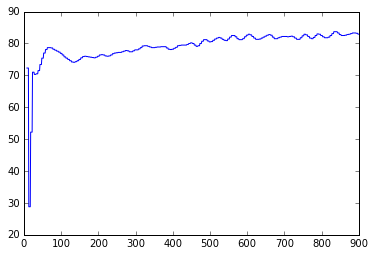

In [484]:
plt.plot(proc['process']['SmO2'][:900])
plt.show()